In [79]:
import scipy 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

напишем функцию, которая будег генерировать выборку заданного размера и строить по ней оценку параметра $\theta$

In [80]:
def dest_and_estimate(n, theta):
    sample = np.random.uniform(low=0.0, high=theta, size=n)
    theta_est = 2*np.average(sample)
    return theta_est

несмещённость по определению: $E(\hat \theta) = \theta$. Проверим это прямым образом: сгенерируем некоторое количество выборок, по каждой из них построим оценку параметра $\theta$ и усредним оценки. Таким образом, мы численно получим матожидание $\hat \theta$, вычтем из него $\theta$. Утверждается, что такая разность должна устремиться к нулю при достаточно большом числе выборок.

In [90]:
#число генерируемых выборок
n_averaging_theta_est = 10
#число чивел в выборке
n_in_sample = 1000
#параметр \theta
theta = 2
#массивы под среднее ошибки матожидания оценки от параметра и число усреднений. 
average_estimation_arr = []
n_averaging_theta_est_arr = []
average_estimation = 0
for j in range(100):
    if j%10==0:
        print(j)
    average_estimation = 0
    for i in range(n_averaging_theta_est):
        average_estimation+=dest_and_estimate(n_in_sample, theta)  
    average_estimation = average_estimation / n_averaging_theta_est
    average_estimation_arr.append(average_estimation - theta)
    n_averaging_theta_est_arr.append(n_averaging_theta_est)
    n_averaging_theta_est=round(n_averaging_theta_est*1.1)
print("finished")

0
10
20
30
40
50
60
70
80
90
finished


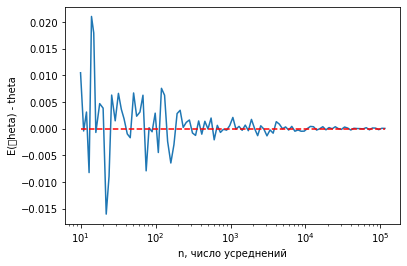

In [91]:
plt.xscale("log")
plt.plot(n_averaging_theta_est_arr, average_estimation_arr)
plt.ylabel("E(\theta) - theta")
plt.xlabel("n, число усреднений")
x1, y1 = [n_averaging_theta_est_arr[0], n_averaging_theta_est_arr[-1]], [0, 0]
plt.plot(x1, y1, 'r--')
plt.show()

При таком подходе видно, что матожидание от оценки стремится к самой истинной оценке, а, значит, несмещена.

Теперь попробуем установить скорость сходимости оценке к истинной. Для этого начнём генерировать выборки различной "мощности" и построим график зависимости $\sqrt{n}|\hat \theta (n)-\theta|$. Там мы должны увидеть ограниченность величины, таким образом мы покажем, что $\sqrt{n}(\hat \theta (n)-\theta) = O(1)$, тогда $\hat \theta (n)-\theta$  сходится к 0 со скоростью $\frac{1}{\sqrt{n}}$.

In [92]:
#число чивел в выборке
n_in_sample = 10
#массивы под разность оценки и параметра \theta и мощность выборки
estimation_error_arr = []
n_in_sample_arr =[]
#в цикле пробежимся по мощностям выборки, увеличивая её каждый раз в 1.1 раза (насколько не жалко ресурсов машины)
for i in range(180):
    if i%10==0:
        print(i)
    #считаем оценку
    estimation = dest_and_estimate(n_in_sample, theta)  
    #пересчитываем её в то, что нам интересно
    estimation_error_arr.append(math.sqrt(n_in_sample)*abs(estimation - theta))
    n_in_sample_arr.append(n_in_sample)
    n_in_sample=round(n_in_sample*1.1)
print("finished")

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
finished


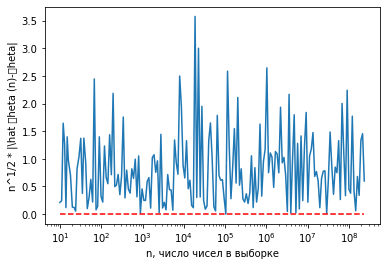

In [93]:
plt.xscale("log")
plt.plot(n_in_sample_arr, estimation_error_arr)
plt.ylabel("n^1/2 * |\hat \theta (n)-\theta|")
plt.xlabel("n, число чисел в выборке")
x1, y1 = [n_in_sample_arr[0], n_in_sample_arr[-1]], [0, 0]
plt.plot(x1, y1, 'r--')
plt.show()

Заметно, что $\sqrt{n}|\hat \theta (n)-\theta| = O(1)$, на данном эксперименте константу можно выбрать равной 4. Таким образом, скорость сходимости оценки $\hat \theta$ к $\theta$: $\frac{1}{\sqrt{n}}$